In [1]:
#install library wordcloud
!pip install wordcloud

In [2]:
#import library wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#import library string
import string

#import library drive
from google.colab import files

uploaded = files.upload()

Saving Product Catalog.csv to Product Catalog.csv


In [ ]:
#dataframe of sold products
df_sales = pd.read_csv('product_pos_transaction.csv', sep='\t',encoding ="latin-1")

In [7]:
#dataframe of product catalog which we want to match with the sold product
df_catalog = pd.read_csv('Product Catalog.csv', sep=';',encoding="latin-1")

In [ ]:
#dataframe POS
df_sales

,Product Name
0,.UTIARA 16@1KG
1,??????
2,@1KG 16-16-16 PRIMA NITROKU
3,@20 KG NPK 16.16.16
4,@20 KG NPK PELANGI 16.16.16
...,...
43997,ZYCHATE 25 WP 100 GRAM
43998,ZYCHATE 25 WP 100 MLL
43999,ZYCHATE 25WP
44000,ZYLUC STICK


In [8]:
#dataframe catalog
df_catalog

,Product SKU,Brand,Type,N%,P%,K%,S%,CaO%,CaSO4.2H20%,SO3%,P2O5%,MgO%,CaCO3%,Ca%,Fungsi,Harga
0,UREA PETRO,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN
1,UREA PIM,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN
2,UREA NITREA,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN
3,UREA DAUN BUAH,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN
4,UREA PUSRI,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,MESTICAL,LAOYING,NITROGEN,15.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,26.0%,NaN,NaN
183,MESTI-GAS,LAOYING,ZA,21.0%,0.0%,0.0%,24.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN
184,MESTAC,LAOYING,NITROGEN,26.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN
185,MESTIKISRIT,LAOYING,MG,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,27.0%,0.0%,0.0%,NaN,NaN


In [9]:
#dataframe catalog to lower
df_catalog['Product SKU']=df_catalog['Product SKU'].str.lower()

In [ ]:
#lowercase all data
df_sales['Product Name'] = df_sales['Product Name'].str.lower()

In [ ]:
#dataframe PoS
df_sales['Product Name']

0                     .utiara 16@1kg
1                             ??????
2        @1kg 16-16-16 prima nitroku
3               @20 kg  npk 16.16.16
4        @20 kg npk pelangi 16.16.16
                    ...             
43997         zychate 25 wp 100 gram
43998          zychate 25 wp 100 mll
43999                   zychate 25wp
44000                    zyluc stick
44001                         zzzzzz
Name: Product Name, Length: 44002, dtype: object

We need to get each individual words to get what products sold and frequency of sold products. This process requires removal of numbers and metrics as they are not put consistently.

In [ ]:
#variable to store each words splitted and store it as set datatype
splitted = ''
stopwords = set(STOPWORDS)

In [ ]:
# iterate through the dataframe
for i in df_sales['Product Name']:

    # typecaste each val to string
    i = str(i)

    # split the value as tokens
    tokens = i.split()

    splitted += " ".join(tokens)+" "

In [ ]:
#build a wordcloud to get commonly used words
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(splitted)

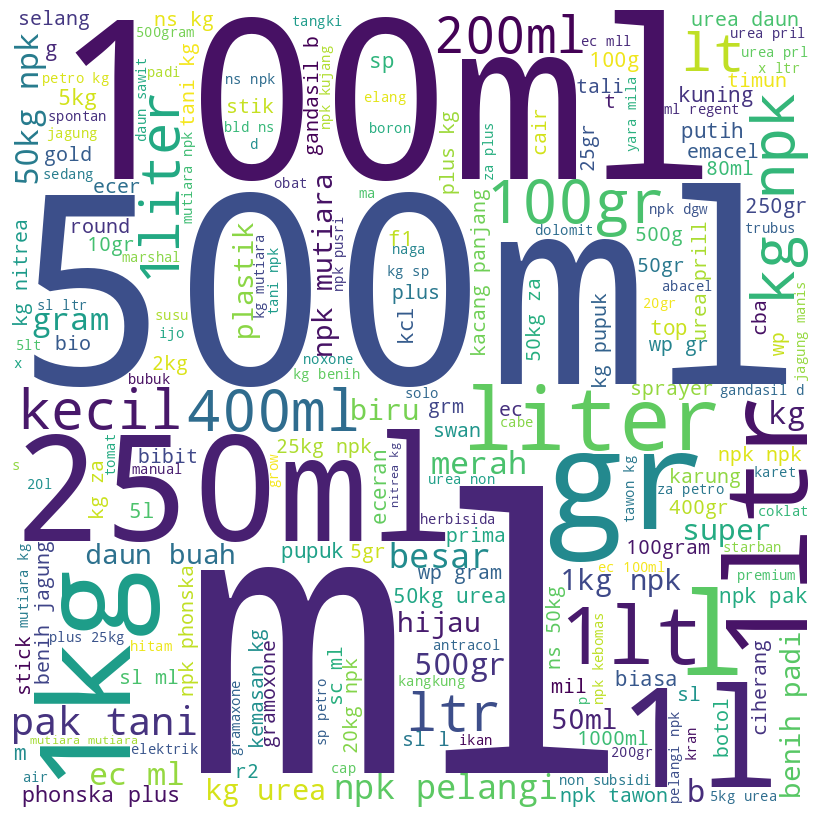

In [ ]:
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

The WordCloud shows most common characters are numbers and metrics, hence remove to get product name.

In [ ]:
#new dataframe
df_sales_clean = df_sales['Product Name']

In [ ]:
#replace any number with nothing
df_sales_clean= df_sales['Product Name'].str.replace('\d+', '')

<ipython-input-87-a744398cad8c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sales_clean= df_sales['Product Name'].str.replace('\d+', '')


In [ ]:
#new dataframe
df_sales_clean

0                 .utiara @kg
1                      ??????
2        @kg -- prima nitroku
3                @ kg  npk ..
4         @ kg npk pelangi ..
                 ...         
43997       zychate  wp  gram
43998        zychate  wp  mll
43999              zychate wp
44000             zyluc stick
44001                  zzzzzz
Name: Product Name, Length: 44002, dtype: object

In [ ]:
#replace all metric and symbols
df_sales_clean = df_sales_clean.str.replace('ml','')
df_sales_clean = df_sales_clean.str.replace('kg','')
df_sales_clean = df_sales_clean.str.replace('meter','')
df_sales_clean = df_sales_clean.str.replace('gram','')
df_sales_clean = df_sales_clean.str.replace('gr','')
df_sales_clean = df_sales_clean.str.replace(' g$','', regex=True)
df_sales_clean = df_sales_clean.str.replace(' g ','')
df_sales_clean = df_sales_clean.str.replace('liter','')
df_sales_clean = df_sales_clean.str.replace('ltr','')
df_sales_clean = df_sales_clean.str.replace('lt','')
df_sales_clean = df_sales_clean.str.replace(' l$','', regex=True)
df_sales_clean = df_sales_clean.str.replace(' l ','')
df_sales_clean = df_sales_clean.str.replace('@','')
df_sales_clean = df_sales_clean.str.replace('-','')
df_sales_clean = df_sales_clean.str.replace('--','')
df_sales_clean

0                .utiara 
1                  ??????
2           prima nitroku
3                  npk ..
4          npk pelangi ..
               ...       
43997       zychate  wp  
43998        zychate  wp 
43999          zychate wp
44000         zyluc stick
44001              zzzzzz
Name: Product Name, Length: 44002, dtype: object

In [ ]:
#membuat fungsi menghilangkan tanda baca
def remove_punctuation(input_string):
  #membuat table translasi
  translator = str.maketrans('','',string.punctuation)

  if isinstance(input_string, str):  # Check if the input is a string
      return input_string.translate(translator)
  else:
      return input_string  # Return the input unchanged if it's not a string

df_sales_clean = df_sales_clean.apply(remove_punctuation)

In [ ]:
# try the wordcloud again
splitted2 = ''
stopwords2 = set(STOPWORDS)

for i in df_sales_clean:

    # typecaste each val to string
    i = str(i)

    # split the value as tokens
    tokens = i.split()

    splitted2 += " ".join(tokens)+" "

In [ ]:
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords2,
                min_font_size = 10).generate(splitted2)

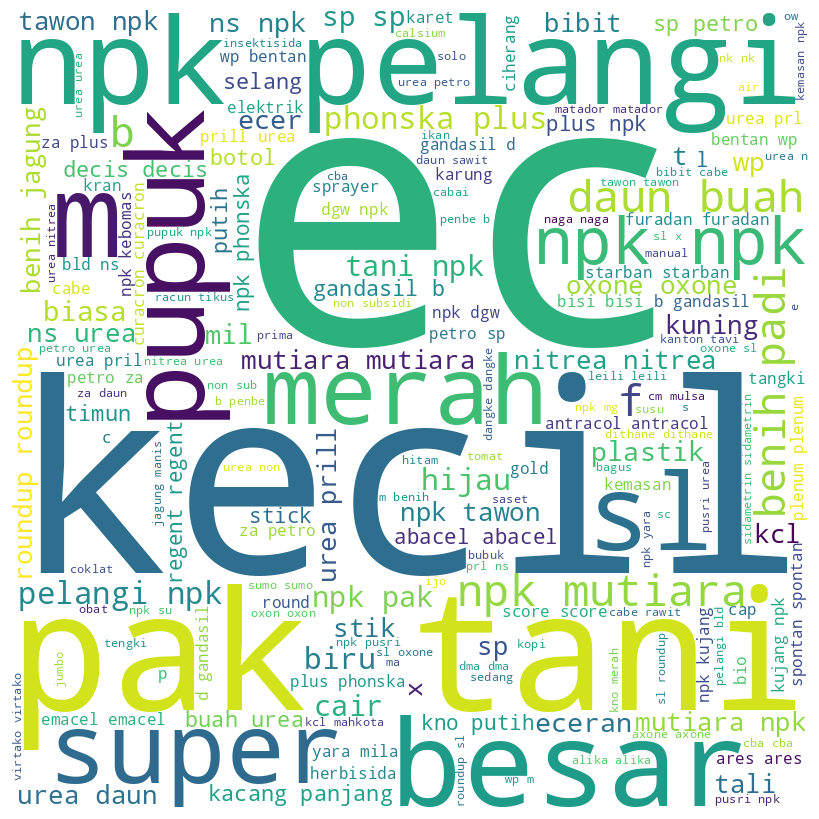

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
#all words
splitted2

'utiara  prima nitroku npk npk pelangi optima nitroku prima nitroku urea prill daun buah pupuk ×× biru ×× putih ×× putih ×× putih ×× biru xx biru xx biru xx biru xx putih xx selang putih xx hitam rthene sk npk x pbintang x polibek miki  cm mulsa enjeng perak paratop bh neocron tmphosat belini rhodiamine danaxone bibit jos  x polibek miki x polibek miki   pak tani  smg x pbintang x polibek miki mahkota  boron roundstar   x pbintang x polibek miki npk pelangi  dgw elang pak tani x pbintang  pak tani x p bintang x polibek miki batu corsak tiga rodasak serangsibel ndamin pak bambu ijo sk ower sk ower kl sk urea non x pbintang x pbintang x polibek miki urea prill daun buah npk pelangi npk pelangi npk plus x pbintang x polibek miki x polibek miki ecchi npk plus phonska plus sp sp sp petro water pump mulsa merpati x x pbintang x polibek miki buras  jumbo pari jumbo premium x x pbintang x polibek miki  roda rol waring rol drip ½ rol drip tenk elektri x pbintang x polibek miki cm mulsa hitam cm

In [ ]:
#split all words by space
words_split = splitted2.split()

In [ ]:
words_split

['utiara',
 'prima',
 'nitroku',
 'npk',
 'npk',
 'pelangi',
 'optima',
 'nitroku',
 'prima',
 'nitroku',
 'urea',
 'prill',
 'daun',
 'buah',
 'pupuk',
 '××',
 'biru',
 '××',
 'putih',
 '××',
 'putih',
 '××',
 'putih',
 '××',
 'biru',
 'xx',
 'biru',
 'xx',
 'biru',
 'xx',
 'biru',
 'xx',
 'putih',
 'xx',
 'selang',
 'putih',
 'xx',
 'hitam',
 'rthene',
 'sk',
 'npk',
 'x',
 'pbintang',
 'x',
 'polibek',
 'miki',
 'cm',
 'mulsa',
 'enjeng',
 'perak',
 'paratop',
 'bh',
 'neocron',
 'tmphosat',
 'belini',
 'rhodiamine',
 'danaxone',
 'bibit',
 'jos',
 'x',
 'polibek',
 'miki',
 'x',
 'polibek',
 'miki',
 'pak',
 'tani',
 'smg',
 'x',
 'pbintang',
 'x',
 'polibek',
 'miki',
 'mahkota',
 'boron',
 'roundstar',
 'x',
 'pbintang',
 'x',
 'polibek',
 'miki',
 'npk',
 'pelangi',
 'dgw',
 'elang',
 'pak',
 'tani',
 'x',
 'pbintang',
 'pak',
 'tani',
 'x',
 'p',
 'bintang',
 'x',
 'polibek',
 'miki',
 'batu',
 'corsak',
 'tiga',
 'rodasak',
 'serangsibel',
 'ndamin',
 'pak',
 'bambu',
 'ijo',


In [ ]:
from collections import Counter

In [ ]:
#Count frequency
Counter(words_split)

Counter({'utiara': 2,
         'prima': 155,
         'nitroku': 78,
         'npk': 2077,
         'pelangi': 289,
         'optima': 48,
         'urea': 708,
         'prill': 158,
         'daun': 369,
         'buah': 277,
         'pupuk': 355,
         '××': 6,
         'biru': 185,
         'putih': 230,
         'xx': 15,
         'selang': 154,
         'hitam': 101,
         'rthene': 1,
         'sk': 8,
         'x': 405,
         'pbintang': 14,
         'polibek': 24,
         'miki': 15,
         'cm': 146,
         'mulsa': 175,
         'enjeng': 3,
         'perak': 22,
         'paratop': 15,
         'bh': 1,
         'neocron': 9,
         'tmphosat': 1,
         'belini': 2,
         'rhodiamine': 8,
         'danaxone': 4,
         'bibit': 326,
         'jos': 27,
         'pak': 285,
         'tani': 381,
         'smg': 1,
         'mahkota': 146,
         'boron': 41,
         'roundstar': 1,
         'dgw': 290,
         'elang': 48,
         'p': 131,
    

In [ ]:
# dictionary variable to store data and frequency
words_freq_dict = Counter(words_split)
words_freq_dict

Counter({'utiara': 2,
         'prima': 155,
         'nitroku': 78,
         'npk': 2077,
         'pelangi': 289,
         'optima': 48,
         'urea': 708,
         'prill': 158,
         'daun': 369,
         'buah': 277,
         'pupuk': 355,
         '××': 6,
         'biru': 185,
         'putih': 230,
         'xx': 15,
         'selang': 154,
         'hitam': 101,
         'rthene': 1,
         'sk': 8,
         'x': 405,
         'pbintang': 14,
         'polibek': 24,
         'miki': 15,
         'cm': 146,
         'mulsa': 175,
         'enjeng': 3,
         'perak': 22,
         'paratop': 15,
         'bh': 1,
         'neocron': 9,
         'tmphosat': 1,
         'belini': 2,
         'rhodiamine': 8,
         'danaxone': 4,
         'bibit': 326,
         'jos': 27,
         'pak': 285,
         'tani': 381,
         'smg': 1,
         'mahkota': 146,
         'boron': 41,
         'roundstar': 1,
         'dgw': 290,
         'elang': 48,
         'p': 131,
    

In [ ]:
#sort by frequency in descending
value_key_pairs = ((value, key) for (key,value) in words_freq_dict.items())
sorted_value_key_pairs = sorted(value_key_pairs, reverse=True)
sorted_value_key_pairs

[(2077, 'npk'),
 (890, 'ec'),
 (849, 'sl'),
 (726, 'wp'),
 (708, 'urea'),
 (638, 'sp'),
 (549, 'plus'),
 (538, 'benih'),
 (493, 'm'),
 (430, 'za'),
 (405, 'x'),
 (400, 'b'),
 (399, 'mutiara'),
 (381, 'tani'),
 (369, 'daun'),
 (358, 'jagung'),
 (355, 'pupuk'),
 (350, 'up'),
 (347, 'merah'),
 (338, 'kecil'),
 (330, 'padi'),
 (327, 'sc'),
 (327, 'petro'),
 (326, 'bibit'),
 (318, 'ns'),
 (301, 'kcl'),
 (292, 'plastik'),
 (290, 'dgw'),
 (289, 'pelangi'),
 (285, 'pak'),
 (277, 'buah'),
 (274, 'tawon'),
 (270, 'besar'),
 (258, 'k'),
 (249, 'top'),
 (248, 'f'),
 (245, 'cair'),
 (231, 'nitrea'),
 (230, 'regent'),
 (230, 'putih'),
 (224, 'super'),
 (224, 'kno'),
 (212, 'gold'),
 (210, 'd'),
 (202, 'gandasil'),
 (193, 'phonska'),
 (185, 'biru'),
 (183, 'kangkung'),
 (183, 'cabe'),
 (182, 'timun'),
 (178, 'cba'),
 (176, 'tali'),
 (175, 'mulsa'),
 (171, 'hijau'),
 (167, 'roundup'),
 (165, 'kacang'),
 (164, 'yara'),
 (158, 'prill'),
 (155, 'prima'),
 (154, 'selang'),
 (152, 'sprayer'),
 (146, 'mahko

All words will be matched with product catalog names with SequenceMatcher ratio and user will be given recommendation based on input similarity with product catalog

In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [ ]:
#test SequenceMatcher using word_split data and df_catalog
similar('nitrea', 'Urea Nitrea')

0.5882352941176471

In [ ]:
#build mapping and recommendation system

product_name = input('Masukkan nama produk: ')
catalog_name = df_catalog['Product SKU']

def similar(a, b):

    #memastikan tipe data bertipe string
    if not isinstance(a, str):
      a = str(a)

    score_list = []

    for i in range(len(b)):

        #memastikan tipe data bersifat string
        if not isinstance(b[i], str):
            b[i] = str(b[i])

        score = SequenceMatcher(None, a, b[i]).ratio()
        score_list.append((score, i))
    score_list.sort(reverse=True)
    return score_list

#variable to store list of scores and index
s = similar(product_name, catalog_name)

def index_to_name(score_list):
    num_list =[]
    name_list = []
    for i in range(len(score_list)):
        idx = score_list[i][1]
        num_list.append(idx)
        name_list.append(df_catalog['Product SKU'][idx])
    if score_list[0][0] >= 0.5:
        return print('Rekomendasi produk pupuk:' ,name_list[:10])
    else:
        return print('Tidak ditemukan produk pupuk tersebut.')

index_to_name(s)

Masukkan nama produk: npk
Tidak ditemukan produk pupuk tersebut.


In [ ]:
s

[(0.3333333333333333, 134),
 (0.3157894736842105, 22),
 (0.3, 26),
 (0.2857142857142857, 39),
 (0.2857142857142857, 33),
 (0.2727272727272727, 25),
 (0.2608695652173913, 166),
 (0.2608695652173913, 160),
 (0.2608695652173913, 108),
 (0.2608695652173913, 18),
 (0.25, 36),
 (0.23529411764705882, 131),
 (0.23076923076923078, 17),
 (0.2222222222222222, 165),
 (0.21052631578947367, 23),
 (0.20689655172413793, 115),
 (0.20689655172413793, 41),
 (0.2, 163),
 (0.2, 162),
 (0.2, 145),
 (0.2, 79),
 (0.2, 62),
 (0.2, 40),
 (0.18181818181818182, 146),
 (0.18181818181818182, 142),
 (0.18181818181818182, 63),
 (0.18181818181818182, 43),
 (0.18181818181818182, 8),
 (0.18181818181818182, 6),
 (0.18181818181818182, 1),
 (0.17391304347826086, 68),
 (0.16666666666666666, 181),
 (0.16666666666666666, 179),
 (0.16666666666666666, 82),
 (0.16666666666666666, 78),
 (0.16666666666666666, 55),
 (0.16666666666666666, 49),
 (0.16666666666666666, 45),
 (0.16666666666666666, 12),
 (0.16666666666666666, 9),
 (0.166

In [ ]:
#mencari persamaan maksimal
def max_identificator(similar):
  max_tuples = [tpl for tpl in similar if tpl[0] == max(tpl[0] for tpl in similar)]
  max_tuples
  return max_tuples

#index to name dataframe version
def index_to_name_df(score_list, threshold):
    num_list =[]
    name_list = []
    for i in range(len(score_list)):
        idx = score_list[i][1]
        num_list.append(idx)
        name_list.append(df_catalog['Product SKU'][idx])
    if score_list[0][0] >= threshold:
        return name_list[0]
        print('berhasil mengkategorikan')
    else:
        return 'new category'
        print('kategori baru diperlukan')

Recommendation system based on name similarity between sales data and product catalog

## **Implementasi**

In [ ]:
#install library gensim
!pip install summa

#install library wordcloud
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=f59fdd18cb99a3bac06bbf7c1b2941b9cf091eca661c9b716b0e2e604189ca6a
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
#import library yang diperlukan
from difflib import SequenceMatcher
from summa import summarizer

#import library wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

#import library string
import string

In [ ]:
#import library drive
from google.colab import files

uploaded = files.upload()

Saving Product Catalog.csv to Product Catalog.csv
Saving product_pos_transaction.csv to product_pos_transaction.csv


In [ ]:
input_threshold = float(input('Masukkan nilai threshold yang mau jadi pembanding: '))

Masukkan nilai threshold yang mau jadi pembanding: 0.7


In [ ]:
#rebuild fungsi yang diperlukan

def similar(a, b):

    #memastikan tipe data bertipe string
    if not isinstance(a, str):
      a = str(a)

    score_list = []

    for i in range(len(b)):

        #memastikan tipe data bersifat string
        if not isinstance(b[i], str):
            b[i] = str(b[i])

        score = SequenceMatcher(None, a, b[i]).ratio()
        score_list.append((score, i))
    score_list.sort(reverse=True)
    return score_list

def index_to_name(score_list):
    num_list =[]
    name_list = []
    for i in range(len(score_list)):
        idx = score_list[i][1]
        num_list.append(idx)
        name_list.append(df_catalog['Product SKU'][idx])
    if score_list[0][0] >= 0.5:
        return print('Rekomendasi produk pupuk:' ,name_list[:10])
    else:
        return print('Tidak ditemukan produk pupuk tersebut.')

#mencari persamaan maksimal
def max_identificator(similar):
  max_tuples = [tpl for tpl in similar if tpl[0] == max(tpl[0] for tpl in similar)]
  max_tuples
  return max_tuples

#index to name dataframe version
def index_to_name_df(score_list, threshold):
    num_list =[]
    name_list = []
    for i in range(len(score_list)):
        idx = score_list[i][1]
        num_list.append(idx)
        name_list.append(df_catalog['Product SKU'][idx])

    if score_list[0][0] >= threshold:
        return name_list[0]
        print('berhasil mengkategorikan')
    else:
        return 'new category'

#buat fungsi cleaner
def column_cleaner(df_columns):

  #replace any number with nothing
  df_columns_clean= df_columns.str.replace('\d+', '')

  #replace all metric and symbols
  df_columns_clean = df_columns_clean.str.replace('ml','')
  df_columns_clean = df_columns_clean.str.replace('kg','')
  df_columns_clean = df_columns_clean.str.replace('meter','')
  df_columns_clean = df_columns_clean.str.replace('gram','')
  df_columns_clean = df_columns_clean.str.replace('gr','')
  df_columns_clean = df_columns_clean.str.replace(' g$','', regex=True)
  df_columns_clean = df_columns_clean.str.replace(' g ','')
  df_columns_clean = df_columns_clean.str.replace('liter','')
  df_columns_clean = df_columns_clean.str.replace('ltr','')
  df_columns_clean = df_columns_clean.str.replace('lt','')
  df_columns_clean = df_columns_clean.str.replace(' l$','', regex=True)
  df_columns_clean = df_columns_clean.str.replace(' l ','')
  df_columns_clean = df_columns_clean.str.replace('@','')
  df_columns_clean = df_columns_clean.str.replace('-','')
  df_columns_clean = df_columns_clean.str.replace('--','')

  #membuat fungsi menghilangkan tanda baca
  def remove_punctuation(input_string):

    #membuat table translasi
    translator = str.maketrans('','',string.punctuation)

    if isinstance(input_string, str):  # Check if the input is a string
        return input_string.translate(translator)
    else:
        return input_string  # Return the input unchanged if it's not a string

  df_columns_clean = df_columns_clean.apply(remove_punctuation)

  return df_columns_clean

In [ ]:
#regenerate dframe

#dataframe of sold products
df_sales = pd.read_csv('product_pos_transaction.csv', sep='\t',encoding ="latin-1")

#lowercase all data
df_sales['Product Name'] = df_sales['Product Name'].str.lower()

#cleaned_product_name
df_sales['Product Name Cleaned'] = column_cleaner(df_sales['Product Name'])

#dataframe of product catalog which we want to match with the sold product
df_catalog = pd.read_csv('Product Catalog.csv', sep=';',encoding="latin-1")

#dataframe catalog to lower
df_catalog['Product SKU']=df_catalog['Product SKU'].str.lower()

#cleaned_product_name
df_catalog['Product SKU Cleaned'] = column_cleaner(df_catalog['Product SKU'])

#buat variabel nama katalog
catalog_name = df_catalog['Product SKU']
catalog_name_cleaned = df_catalog['Product SKU Cleaned']

<ipython-input-5-cfb91d4a6d52>:59: FutureWarning: The default value of regex will change from True to False in a future version.
  df_columns_clean= df_columns.str.replace('\d+', '')
<ipython-input-5-cfb91d4a6d52>:59: FutureWarning: The default value of regex will change from True to False in a future version.
  df_columns_clean= df_columns.str.replace('\d+', '')


In [ ]:
df_sales.head(10)

,Product Name,Product Name Cleaned
0,.utiara 16@1kg,utiara
1,??????,
2,@1kg 16-16-16 prima nitroku,prima nitroku
3,@20 kg npk 16.16.16,npk
4,@20 kg npk pelangi 16.16.16,npk pelangi
5,@50kg 15-9-20 optima nitroku,optima nitroku
6,@50kg 16-16-16 prima nitroku,prima nitroku
7,@5kg urea prill daun buah,urea prill daun buah
8,@pupuk50kg,pupuk
9,"0,15×15×50 biru",×× biru


In [ ]:
df_catalog.head(100)

,Product SKU,Brand,Type,N%,P%,K%,S%,CaO%,CaSO4.2H20%,SO3%,P2O5%,MgO%,CaCO3%,Ca%,Fungsi,Harga,Product SKU Cleaned
0,urea petro,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,urea petro
1,urea pim,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,urea pim
2,urea nitrea,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,urea nitrea
3,urea daun buah,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,urea daun buah
4,urea pusri,PIHC,UREA,46.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,urea pusri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,pak tani fertila 13-6-27-4mg+0.65b+te,PAK TANI,MAJEMUK,13.0%,6.0%,27.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,pak tani fertila mgbte
96,pak tani fertila 18-6-14+5s,PAK TANI,MAJEMUK,18.0%,6.0%,14.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,pak tani fertila s
97,pak tani fertilla 18-8-10+3mgo+te,PAK TANI,MAJEMUK,18.0%,8.0%,10.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,pak tani fertilla mgote
98,pak tani fertila 21-14-7+4mgo+te,PAK TANI,MAJEMUK,21.0%,14.0%,7.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,pak tani fertila mgote


In [ ]:
#variable to store list of scores and index
df_sales['Product SKU'] = df_sales['Product Name'].apply(lambda x: index_to_name_df(max_identificator(similar(x,catalog_name)),threshold=input_threshold))

#variable to store list of scores and index
df_sales['Product SKU Cleaned'] = df_sales['Product Name Cleaned'].apply(lambda x: index_to_name_df(max_identificator(similar(x,catalog_name_cleaned)),threshold=input_threshold))

In [ ]:
df_sales.head(10)

,Product Name,Product Name Cleaned,Product SKU,Product SKU Cleaned
0,.utiara 16@1kg,utiara,new category,mutiara 16-16-16
1,??????,,new category,new category
2,@1kg 16-16-16 prima nitroku,prima nitroku,new category,new category
3,@20 kg npk 16.16.16,npk,new category,new category
4,@20 kg npk pelangi 16.16.16,npk pelangi,new category,npk pelangi 13-6-27-4
5,@50kg 15-9-20 optima nitroku,optima nitroku,new category,new category
6,@50kg 16-16-16 prima nitroku,prima nitroku,new category,new category
7,@5kg urea prill daun buah,urea prill daun buah,urea daun buah,urea daun buah
8,@pupuk50kg,pupuk,new category,new category
9,"0,15×15×50 biru",×× biru,new category,new category


In [ ]:
df_sales['SKU Summary'] = None

# Apply summarizer only to rows where 'Product SKU' is 'new category'
df_sales.loc[df_sales['Product SKU'] == 'new category', 'SKU Summary'] = df_sales.loc[df_sales['Product SKU'] == 'new category', 'Product Name'].astype(str).apply(lambda x: summarizer.summarize(x))

# For rows where 'Product SKU' is not 'new category', copy the 'Product SKU' value
df_sales.loc[df_sales['Product SKU'] != 'new category', 'SKU Summary'] = df_sales.loc[df_sales['Product SKU'] != 'new category', 'Product SKU'].astype(str)

# Optional: If you want to fill NaN values in the 'SKU Summary' column with an empty string
df_sales['SKU Summary'] = df_sales['SKU Summary'].fillna('')

# Display the DataFrame
df_sales.head(1000)

,Product Name,Product Name Cleaned,Product SKU,Product SKU Cleaned,SKU Summary
0,.utiara 16@1kg,utiara,new category,mutiara 16-16-16,
1,??????,,new category,new category,
2,@1kg 16-16-16 prima nitroku,prima nitroku,new category,new category,
3,@20 kg npk 16.16.16,npk,new category,new category,
4,@20 kg npk pelangi 16.16.16,npk pelangi,new category,npk pelangi 13-6-27-4,
...,...,...,...,...,...
995,aladin 200ml,aladin,new category,new category,
996,aladin 400ml,aladin,new category,new category,
997,aladin 800ml,aladin,new category,new category,
998,aladin 865 sl 200ml,aladin sl,new category,new category,


In [ ]:
df_sales = pd.merge(df_sales,df_catalog,on='Product SKU',how='left')
df_sales.head(10)

,Product Name,Product Name Cleaned,Product SKU,Product SKU Cleaned_x,SKU Summary,Brand,Type,N%,P%,K%,...,CaO%,CaSO4.2H20%,SO3%,P2O5%,MgO%,CaCO3%,Ca%,Fungsi,Harga,Product SKU Cleaned_y
0,.utiara 16@1kg,utiara,new category,mutiara 16-16-16,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,??????,,new category,new category,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@1kg 16-16-16 prima nitroku,prima nitroku,new category,new category,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@20 kg npk 16.16.16,npk,new category,new category,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@20 kg npk pelangi 16.16.16,npk pelangi,new category,npk pelangi 13-6-27-4,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,@50kg 15-9-20 optima nitroku,optima nitroku,new category,new category,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,@50kg 16-16-16 prima nitroku,prima nitroku,new category,new category,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,@5kg urea prill daun buah,urea prill daun buah,urea daun buah,urea daun buah,urea daun buah,PIHC,UREA,46.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,NaN,NaN,urea daun buah
8,@pupuk50kg,pupuk,new category,new category,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"0,15×15×50 biru",×× biru,new category,new category,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sales.to_csv('\content\product_pos_transaction_categorized.csv', index=False)

from google.colab import files

files.download('\content\product_pos_transaction_categorized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### besok melanjutkan:
- mendapatkan insight frekuensi pembelian
- semua words split akan dijadikan input similarity Jaccard, memasangkan dengan semua nama di katalog
- sehingga contoh jika user input 'urea' maka sistem merekomendasikan semua nama produk pupuk 'urea'
- tujuan sistem rekomendasi: mempermudah toko tani membuat data penjualan yg akurat
- Tambahan : Setelah mendapatkan rekomendasi nama yang sesuai, akhirnya dipilihlah nama dengan skor Jaccard mendekati 1 dengan threshold > 0.3, artinya rows yang similarity jaccardnya dibawah 0.3 dianggap produk tersebut belum terdapat pada database dan perlu ditambahkan kategorinya.
- Ketika thresholdnya 0,3 sebagian besar rows dapat dikategorikan namun hasil pengkategoriannya kurang tepat, sementara ketika thresholdnya 0,6, hasil pengkategorian jauh lebih sedikit, namun lebih baik dari segi keakuratan kategori.

###### Hasil menunjukkan ukuran produk lebih sering muncul daripada produk.
- lowercase data product name
- Akan dilakukan filtering, menghilangkan angka, satuan pengukuran dan tanda baca
- Ganti ke histogram menunjukkan 20 kata terbanyak muncul.
- Buat grafik frekuensi kata yg muncul, lalu menentukan threshold minimal frekuensi tiap kata.
- Semua kata yg frekuensinya di atas threshold, akan dipasangkan dengan nama produk katalog sesuai similarity (Jaccard)
- Hasil berupa rekomendasi nama produk sesuai format katalog